# EDA Assignment - Bike Details Dataset
Assignment Code: DA-AG-009

In [10]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Mount Google Drive
drive.mount('/content/drive')

# Path to CSV in Google Drive
csv_drive_path = '/content/drive/MyDrive/PW SKILLS DATA ANALYST/BIKE DETAILS.csv'

if os.path.exists(csv_drive_path):
    df = pd.read_csv(csv_drive_path)
    print("Loaded CSV from Google Drive.")
else:
    df = pd.read_csv("BIKE DETAILS.csv")
    print("Loaded CSV from local file.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded CSV from Google Drive.


### Question 1
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

**Theory:** The first step in EDA is reading the dataset to understand its structure. Shape and column names provide insights into dataset size and features.

In [2]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head(10)

Shape: (1061, 7)
Columns: Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


### Question 2
Check for missing values in all columns.

**Theory:** Missing values can be dropped or imputed (mean, median, mode, interpolation). Choice depends on data importance.

In [3]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


### Question 3
Plot the distribution of selling prices.

**Theory:** A histogram shows how selling prices are distributed and highlights skewness or concentration.

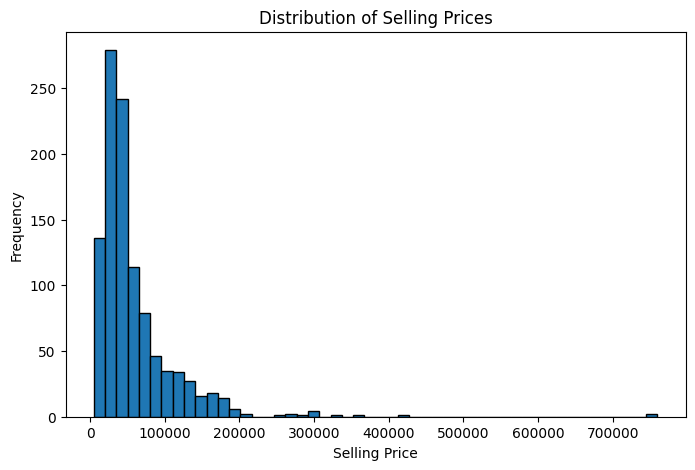

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=50, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### Question 4
Create a bar plot of average selling price per seller_type.

**Theory:** Seller type impacts resale value. Dealers may charge more due to warranties/services.

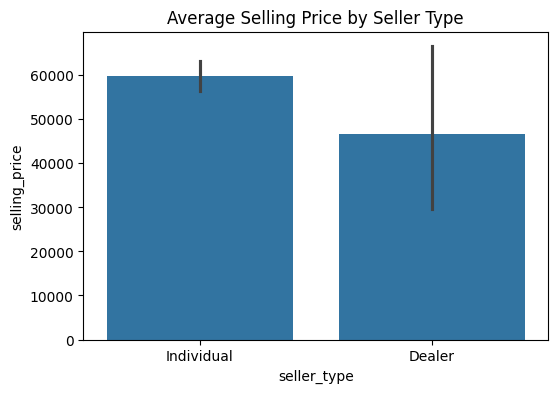

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x='seller_type', y='selling_price', data=df)
plt.title('Average Selling Price by Seller Type')
plt.show()

### Question 5
Compute average km_driven per ownership type.

**Theory:** Ownership history affects value. First-owner bikes are typically better maintained and priced higher.

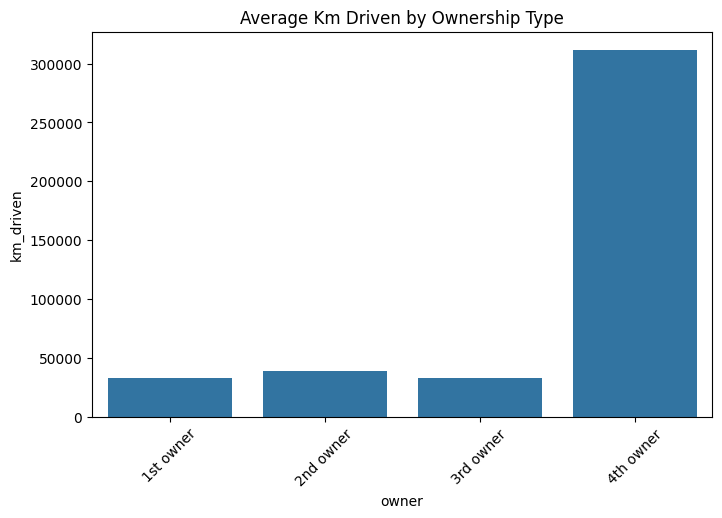

In [12]:
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km)
plt.title('Average Km Driven by Ownership Type')
plt.xticks(rotation=45)
plt.show()

### Question 6
Remove outliers in km_driven using IQR.

**Theory:** Outliers distort averages. The IQR method removes extreme values beyond 1.5*IQR from Q1/Q3.

In [13]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

before = df['km_driven'].describe()
df_clean = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
after = df_clean['km_driven'].describe()

print("Before:\n", before)
print("\nAfter:\n", after)

Before:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


### Question 7
Scatter plot of year vs selling_price.

**Theory:** Newer bikes generally sell for higher prices, showing depreciation with age.

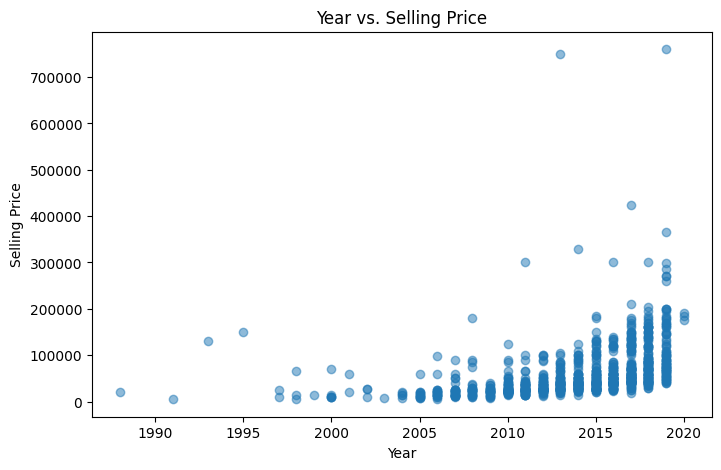

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

### Question 8
One-hot encode seller_type.

**Theory:** Machine learning models require numeric inputs. One-hot encoding converts categorical values into binary columns.

In [15]:
encoded = pd.get_dummies(df, columns=['seller_type'])
encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


### Question 9
Correlation heatmap.

**Theory:** Heatmaps show correlations (-1 to +1). Strong positive/negative correlations indicate relationships or redundancy.

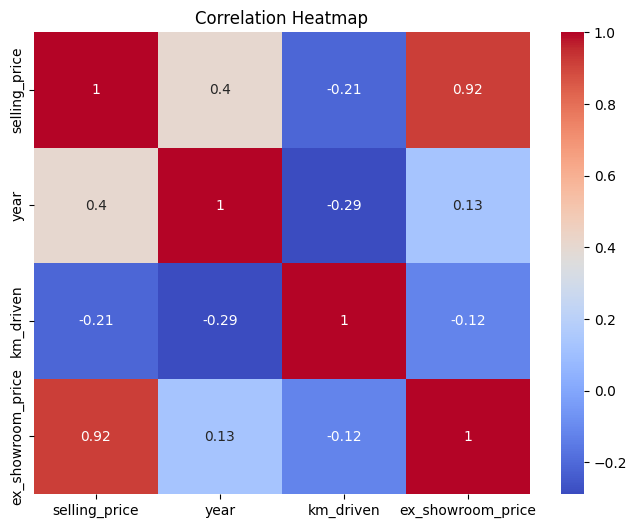

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Question 10
Summary Findings.

**Theory:**
- **Important factors:** Year (age), km_driven, seller_type, ownership history.
- **Data cleaning:** Missing values handled, outliers removed.
- **Feature engineering:** One-hot encoding categorical variables.

Overall, depreciation, mileage, and ownership history strongly impact bike resale value.